In [1]:
import numpy as np
import seaborn as sns
import rasterio as rs
import hickle as hkl

In [2]:
#TODO
# Heterogenous farms

# Mountain forests

# Urban false positive
# 361 1642


#Open canopy forests
# 2291 770
# 6014 1137 

# Dry forest False negative

# Smallscale deforestation
# 362 1278


In [7]:
from skimage.transform import resize
from scipy.ndimage.morphology import binary_dilation, binary_erosion

tile = '1669X1125Y'

train_tif = f"train/october/{tile}_train.tif"
bad = f"train/october/{tile}_FINAL.tif"
y = rs.open(train_tif).read(1).astype(np.float32) / 100
#bad = rs.open(bad).read(1).astype(np.float32) / 100
#y = y * bad
#y = resize(y, bad.shape, 0)
#bad = bad > 0.1
y = y.astype(np.float32)
y2 = np.copy(y)
#y = y * bad
ard = "../../src/train_sample.hkl"
max_y = 1.
n_samples =6
n_tries = 6
year = 'gtmnew'
x = hkl.load(ard)
#y = np.ones_like(x[0, ..., 0])
#y[y < 0.75] = 0.
# y = y ** 1.5

y[y >= 0.9] = 1.
y[y <= 0.35] = 0.
#y[y < 0.6] = y[y < 0.6] ** 1.5


#y = 1 - (binary_dilation(1 - y, iterations = 1))
#y = y ** 1.25
#y[y > 0.4] = 0.95

In [8]:
#x = x[:, :, :-2, :]
#x = x.reshape((12, 618 // 6, 6, 590 // 6, 6, 17))
#x = np.mean(x, axis = (2, 4))
#x.shape

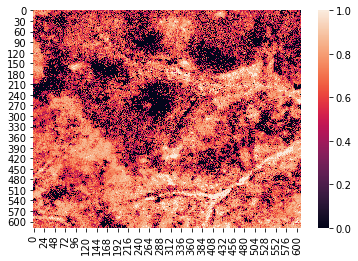

In [9]:
sns.heatmap(y)

##### sns.heatmap(y)

In [40]:
min_y = 80
max_y = y.shape[0] - 80
min_x = 80
max_x = y.shape[1] - 80

y2 = np.copy(y)

x_samples = np.random.randint(min_x, max_x, n_tries)
y_samples = np.random.randint(min_y, max_y, n_tries)

ys = []
xs = []

for xpx, ypx in zip(x_samples, y_samples):
    yi = y[ypx-79:ypx+79, xpx-79:xpx+79]
    #bi = bad[ypx-7:ypx+7, xpx-7:xpx+7]
    #if (np.mean((yi) <= 0.5) >= 0.00) and (np.mean(yi >= 0.5) > 0.25):
    #if np.mean((bi - yi) > 0.5) > 0.2:
    #if (np.mean(yi > 0.2) >= 0.4) and (np.mean(yi < 0.3) >= 0.1):
    xi = x[:, ypx-86:ypx+86, xpx-86:xpx+86, :]
    if (xi.shape[1] == 172) and (xi.shape[2] == 172):
        ys.append(yi[np.newaxis])
        xs.append(xi[np.newaxis])
        y2[ypx-79:ypx+79, xpx-79:xpx+79] = 3.

ys = np.concatenate(ys, axis = 0)
xs = np.concatenate(xs, axis = 0)
#ys = ys ** 0.3

(6, 158, 158)


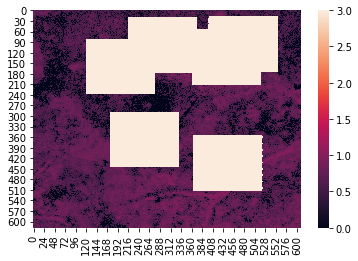

In [41]:
sns.heatmap(y2)
print(ys.shape)

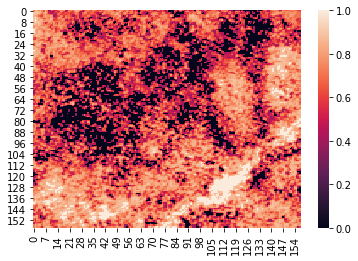

In [46]:
sns.heatmap(ys[0])

In [47]:
#ys = ys[:20]
#xs = xs[:20]
#tile = '449X1239Y'
np.save(f"{tile}_y.npy", ys[:8])
hkl.dump(xs[:8].astype(np.float32), f"{tile}_x.hkl", mode='w', compression='gzip')
#sns.heatmap(y2)

In [136]:
xs.dtype

dtype('<f4')

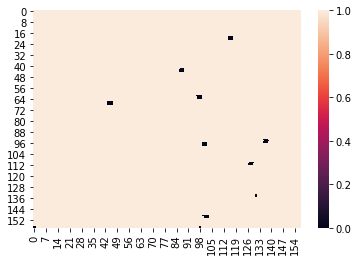

In [139]:
sns.heatmap(ys[2])

In [36]:
year = 'honduras'

xs = []
ys = []
ends = [111, 111, 111, 57, 65, 18, 99, 99]
for i in range(1, 8):
    x = np.load(f'x_honduras{str(i)}.npy', allow_pickle = True)#[:ends[i]]
    y = np.load(f'y_honduras{str(i)}.npy', allow_pickle = True)#[:ends[i]]
    print(x.shape, y.shape)
    xs.append(x[:ends[i]])
    ys.append(y[:ends[i]])
    
        

xs = np.concatenate(xs, axis = 0)
ys = np.concatenate(ys, axis = 0)
np.save(f"y_{year}-all.npy", ys)
np.save(f"x_{year}-all.npy", xs)
#x3 = x3[62:]
#y3 = y3[62:]
print(ys.shape, ys.shape)
#np.save(f"y_{year}.npy", ys)
#np.save(f"x_{year}.npy", xs)

(41, 12, 28, 28, 17) (41, 14, 14)
(48, 12, 28, 28, 17) (48, 14, 14)
(71, 12, 28, 28, 17) (71, 14, 14)
(63, 12, 28, 28, 17) (63, 14, 14)
(18, 12, 28, 28, 17) (18, 14, 14)
(29, 12, 28, 28, 17) (29, 14, 14)
(23, 12, 28, 28, 17) (23, 14, 14)
(279, 14, 14) (279, 14, 14)


In [24]:
np.mean(xs[45], axis = (0, 1, 2))

array([ 0.02250696,  0.04276221,  0.02063912,  0.33945096,  0.07683436,
        0.26072082,  0.3332325 ,  0.36602882,  0.15254009,  0.06104243,
        0.34658983,  0.7058461 ,  0.3878098 ,  0.61326724, -0.3531459 ,
        0.5758433 ,  0.6885064 ], dtype=float32)

In [11]:
np.mean(xs[44], axis = (0, 1, 2))

array([0.04306386, 0.064793  , 0.07831123, 0.23217636, 0.12255476,
       0.18915121, 0.21849115, 0.25197524, 0.2525602 , 0.15480722,
       0.08380763, 0.60419893, 0.32813177, 0.2875572 , 0.06399839,
       0.2608518 , 0.264294  ], dtype=float32)

In [47]:
np.mean(ys[-50:], axis = (1, 2))

array([0.5766326 , 0.37413263, 0.16010204, 0.6313776 , 0.44714284,
       0.16586736, 0.2728061 , 0.18515307, 0.59591836, 0.02096939,
       0.5590816 , 0.18678571, 0.17948979, 0.21469387, 0.04520408,
       0.6130101 , 0.3501531 , 0.48224488, 0.5160714 , 0.02841837,
       0.670204  , 0.07913265, 0.16066326, 0.37051022, 0.4319388 ,
       0.2227551 , 0.577398  , 0.28244898, 0.38510206, 0.08744898,
       0.08413265, 0.3345918 , 0.6243367 , 0.29959184, 0.61499995,
       0.04545918, 0.21801022, 0.18306121, 0.3630102 , 0.15489796,
       0.38198978, 0.40882656, 0.46311224, 0.3752551 , 0.45408162,
       0.5480612 , 0.32280615, 0.25964284, 0.04260204, 0.4683163 ],
      dtype=float32)

In [13]:
y1 =np.load("y_guat2-all.npy")
np.mean(y1, axis = (1, 2))

array([0.78061223, 0.9438776 , 0.95408165, 0.8061224 , 0.78061223,
       0.7755102 , 0.77040815, 0.9744898 , 0.81122446, 0.9183673 ,
       0.7653061 , 0.7397959 , 0.9132653 , 0.8469388 , 0.71428573,
       0.9591837 , 0.70408165, 0.72959185, 0.77040815, 0.622449  ,
       0.96938777, 0.9744898 , 0.5969388 , 0.78571427, 0.68367344,
       0.96938777, 0.6683673 , 0.96938777, 0.8214286 , 0.6989796 ,
       0.78056115, 0.5758674 , 0.69943875, 0.72494894, 0.76255095,
       0.6042347 , 0.6231633 , 0.7637245 , 0.7729082 , 0.74663264,
       0.7977552 , 0.61188775, 0.69882655, 0.77678573, 0.6875511 ,
       0.78265303, 0.3365306 , 0.73489803, 0.5056633 , 0.76770407,
       0.6894897 , 0.63178575, 0.6038265 , 0.3839796 , 0.6286735 ,
       0.47852036, 0.31066328, 0.68020403, 0.74224496, 1.        ,
       1.        , 1.        , 0.44066325, 0.64602035, 0.7453571 ,
       0.38918367, 0.5453061 , 0.06811224, 0.46438774, 0.26066327,
       0.3609694 , 0.5991327 , 0.6964286 , 0.5266836 , 0.49505

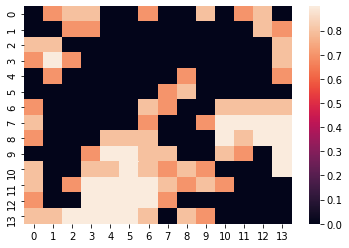

In [14]:
sns.heatmap(ys[12])